In [351]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import copy
import math

In [352]:
gun_violence = pd.read_csv('gun-violence-data_01-2013_03-2018.csv')

In [353]:
plt.rcParams['figure.figsize'] = (20, 30)
sns.set(font_scale=2)

In [354]:
gun_violence.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


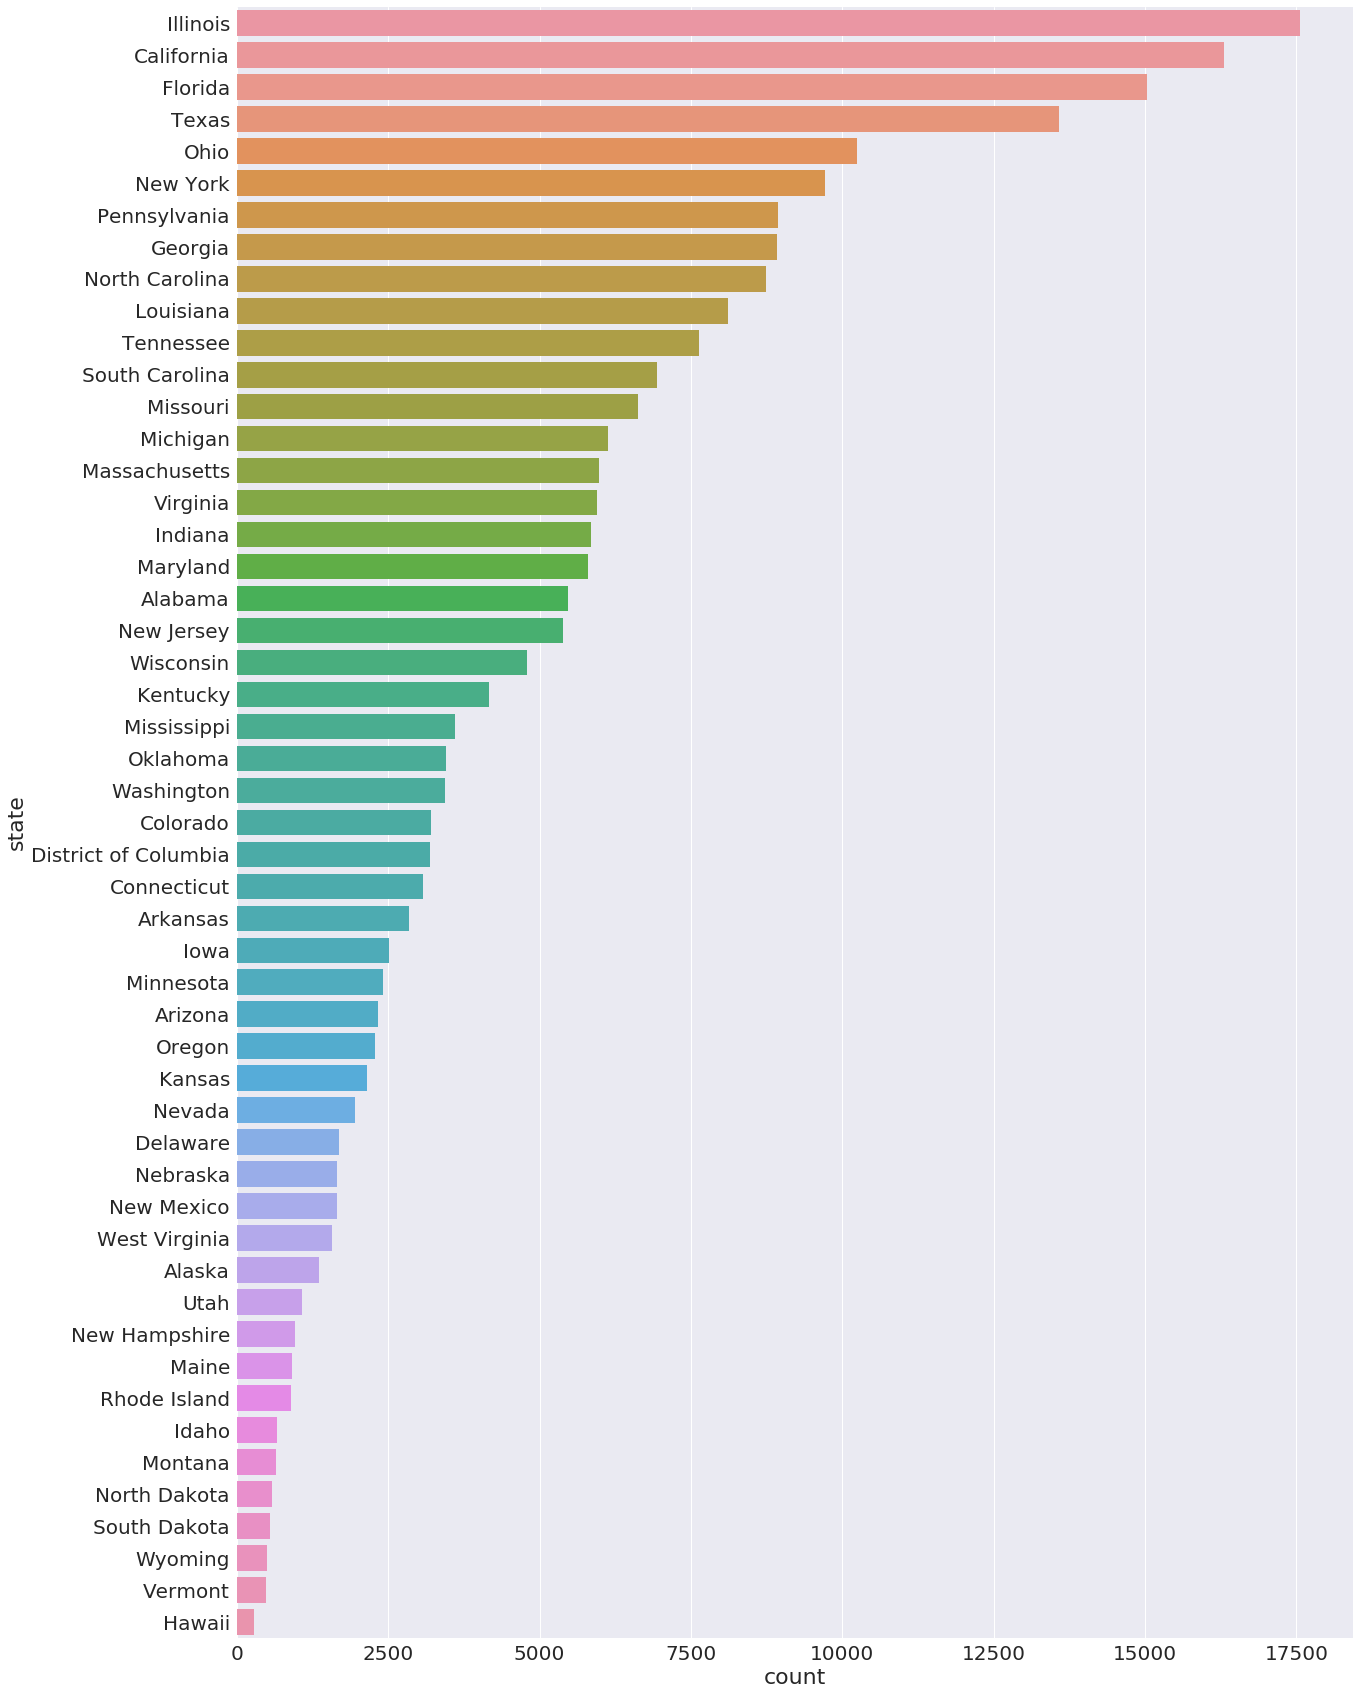

In [355]:
# Which states had the most incidences of gun violence?

sns.countplot(y='state', data=gun_violence, order=gun_violence['state'].value_counts().index)

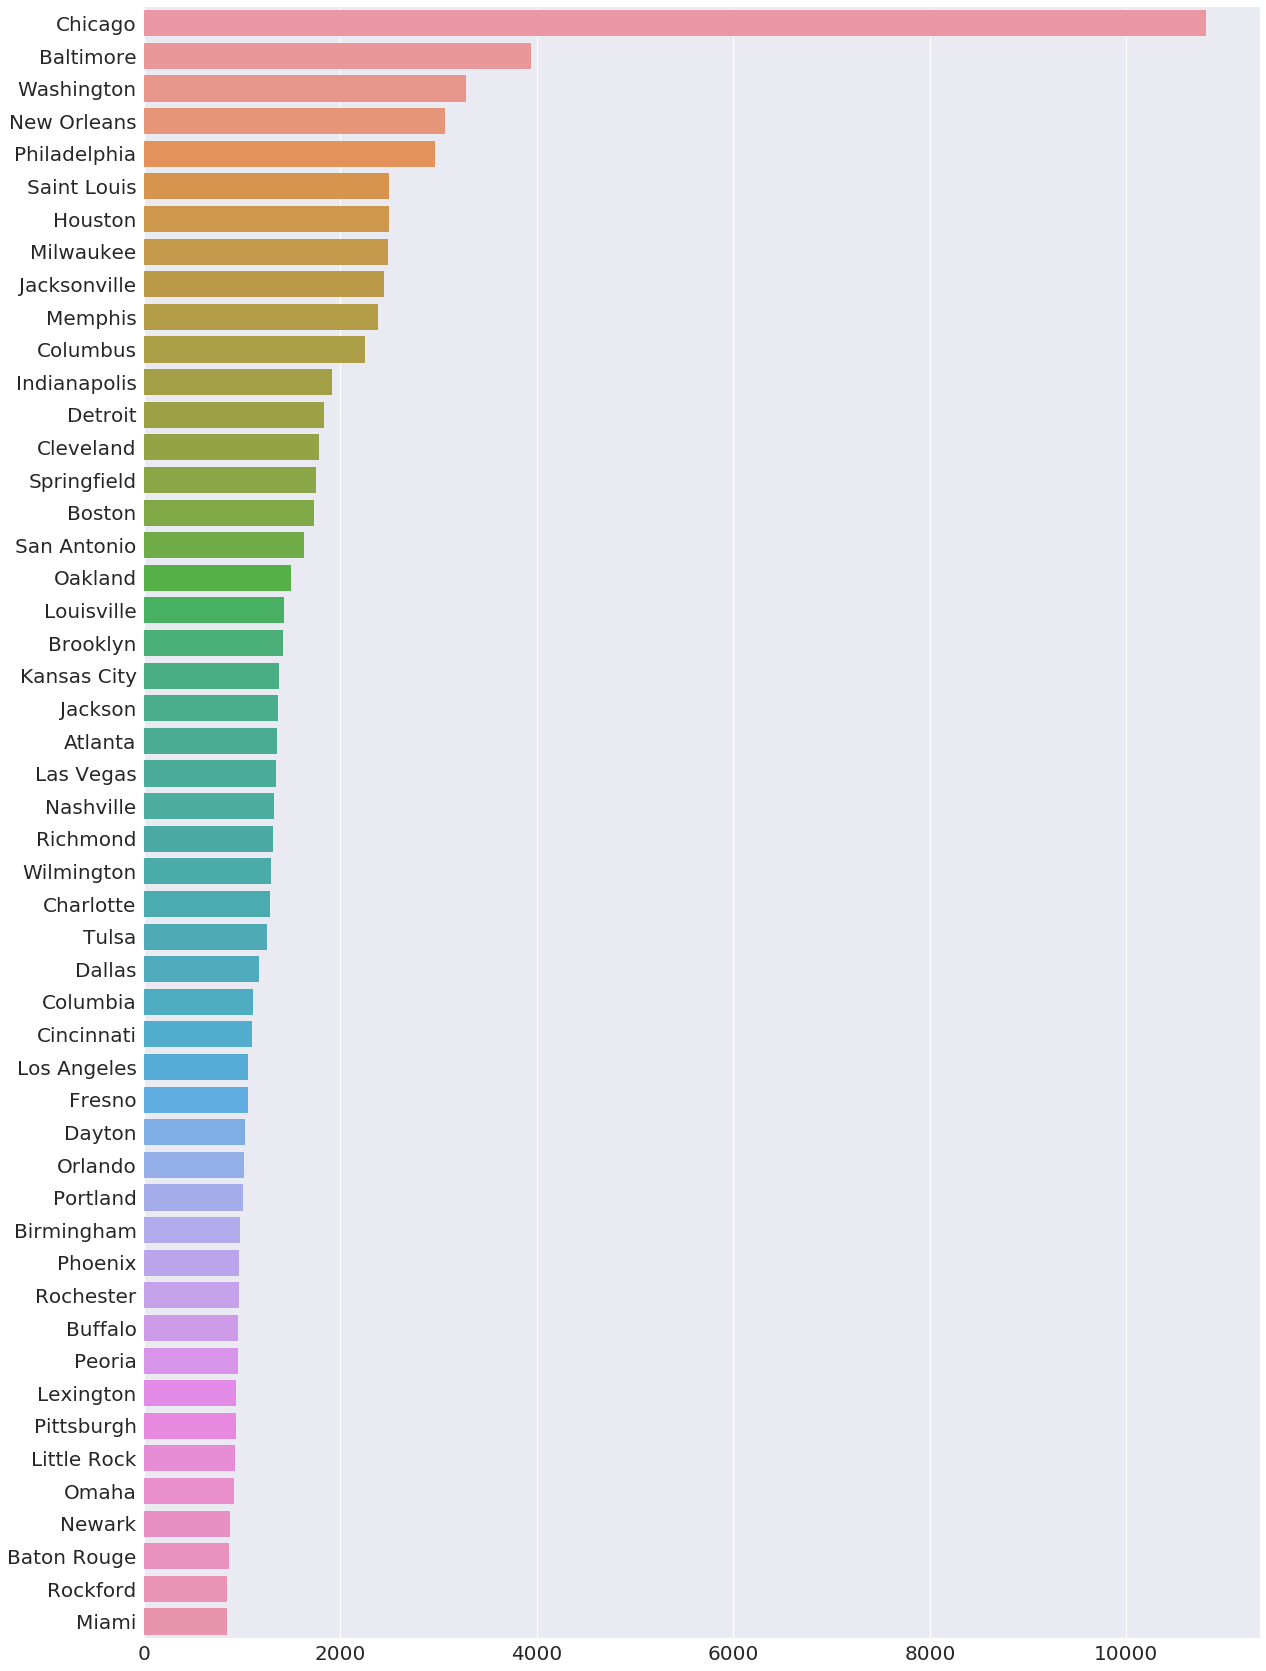

In [356]:
# Which cities/counties had the most incidences of gun violence?

cities_counties_most_gun_violence = gun_violence['city_or_county'].value_counts()
cities_counties_most_gun_violence = cities_counties_most_gun_violence.sort_values(ascending=False)
cities_counties_most_gun_violence.head(50)
cities_with_most_gun_violence_top_50 = cities_counties_most_gun_violence.head(50)
sns.barplot(y=cities_with_most_gun_violence_top_50.index, x=cities_with_most_gun_violence_top_50.values)

In [357]:
gun_violence.head(10)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,http://www.gunviolencearchive.org/incident/478948,http://usnews.nbcnews.com/_news/2013/01/07/163...,False,...,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Rebeika Powell||1::Kayetie Melchor||2::Mist...,NaN,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.kjrh.com/news/local-news/4-found-sh...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,http://www.gunviolencearchive.org/incident/479363,http://hinterlandgazette.com/2013/01/pastor-gr...,False,...,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Greg Griego||1::Sara Griego||2::Zephania Gr...,5::Family,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://www.cbsnews.com/news/nehemiah-gringo-ca...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,http://www.gunviolencearchive.org/incident/479374,http://www.nola.com/crime/index.ssf/2013/01/no...,False,...,NaN,NaN,0:

In [358]:
gun_violence['date'] = pd.to_datetime(gun_violence['date'], format="%Y-%m-%d")

In [359]:
# creates a new dataframe of rows of states keeping the dates of gun violence incidents
state_and_date_gun_incidences = gun_violence.sort_values(by=['state', 'date']).copy()
state_and_date_gun_incidences = state_and_date_gun_incidences.drop(columns=['city_or_county', 'address', 
        'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 
        'congressional_district', 'participant_age', 'participant_age_group', 'participant_gender', 
        'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 
        'n_guns_involved', 'notes', 'participant_name', 'participant_relationship', 'participant_status', 
        'incident_id', 'participant_status', 'sources', 'state_house_district', 'state_senate_district', 
        'participant_type'])
state_and_date_gun_incidences.head(10)
len(state_and_date_gun_incidences)

# removed all unnecessary columns in order to create a heatmap

239677

In [360]:
# extracted incidences for each year and put them into their own dataframes in a list
gun_incidences_per_year_per_month_per_state = list()
for year in range(2014, 2018):
    gun_incidences_per_year_per_month_per_state.append(state_and_date_gun_incidences.loc[(state_and_date_gun_incidences['date'].dt.year == year)].copy())

gun_incidences_per_year_per_month_per_state[0].head(10)

,date,state
296,2014-01-01,Alabama
315,2014-01-01,Alabama
320,2014-01-01,Alabama
383,2014-01-01,Alabama
394,2014-01-01,Alabama
396,2014-01-01,Alabama
400,2014-01-01,Alabama
465,2014-01-01,Alabama
510,2014-01-02,Alabama
524,2014-01-02,Alabama


In [361]:
def extract_month_from_date(date):
    if date.month == 1:
        return "January"
    elif date.month == 2:
        return "February"
    elif date.month == 3:
        return "March"
    elif date.month == 4:
        return "April"
    elif date.month == 5:
        return "May"
    elif date.month == 6:
        return "June"
    elif date.month == 7:
        return "July"
    elif date.month == 8:
        return "August"
    elif date.month == 9:
        return "September"
    elif date.month == 10:
        return "October"
    elif date.month == 11:
        return "November"
    elif date.month == 12:
        return "December"
    
# created a new month column and extracted the month from each date
for each_year in gun_incidences_per_year_per_month_per_state:
    each_year['month'] = each_year['date'].apply(extract_month_from_date)
    
gun_incidences_per_year_per_month_per_state[1].head(10)

,date,state,month
52135,2015-01-01,Alabama,January
52292,2015-01-01,Alabama,January
52416,2015-01-02,Alabama,January
52419,2015-01-02,Alabama,January
52434,2015-01-02,Alabama,January
52477,2015-01-03,Alabama,January
52485,2015-01-03,Alabama,January
52511,2015-01-03,Alabama,January
52524,2015-01-03,Alabama,January
52683,2015-01-04,Alabama,January


In [362]:
# grouped data by state and month and aggregated it
# took the size of the aggregation to get the number of incidences for each month in each year for every state
gun_incidences_per_year_aggregate_months = list()
for year in range(len(gun_incidences_per_year_per_month_per_state)):
    gun_incidences_per_year_aggregate_months.append(gun_incidences_per_year_per_month_per_state[year].groupby(['state', 'month']).size().copy())

In [363]:
gun_incidences_per_year_aggregate_months[1].head(10)

state    month   
Alabama  April       80
         August      97
         December    77
         February    66
         January     86
         July        97
         June        78
         March       92
         May         97
         November    80
dtype: int64

In [364]:
# previous operation returned a series
# turned each list item back into a dataframe
for each_year in range(len(gun_incidences_per_year_aggregate_months)):
    gun_incidences_per_year_aggregate_months[each_year] = pd.DataFrame(gun_incidences_per_year_aggregate_months[each_year])

gun_incidences_per_year_aggregate_months[1].head(15)

0
state   month         
Alabama April       80
        August      97
        December    77
        February    66
        January     86
        July        97
        June        78
        March       92
        May         97
        November    80
        October    105
        September   79
Alaska  April       38
        August      44
        December    23

In [365]:
# reset the indexes to make the new index use the 'state' column for each year
# renamed the aggregate column to be monthly incidences for each year
# made 'state' the index

for each_year in range(len(gun_incidences_per_year_aggregate_months)):
    gun_incidences_per_year_aggregate_months[each_year] = gun_incidences_per_year_aggregate_months[each_year].reset_index()
    gun_incidences_per_year_aggregate_months[each_year] = gun_incidences_per_year_aggregate_months[each_year].rename({'state':'state', 'month':'month', 0:'monthly incidences'}, axis='columns')
    gun_incidences_per_year_aggregate_months[each_year] = gun_incidences_per_year_aggregate_months[each_year].set_index(['state'])


In [366]:
gun_incidences_per_year_aggregate_months[1].head(10)

,month,monthly incidences
state,,
Alabama,April,80
Alabama,August,97
Alabama,December,77
Alabama,February,66
Alabama,January,86
Alabama,July,97
Alabama,June,78
Alabama,March,92
Alabama,May,97


In [367]:

for each_year in range(len(gun_incidences_per_year_aggregate_months)):
    df_index = gun_incidences_per_year_aggregate_months[each_year].index.copy()
    gun_incidences_per_year_aggregate_months[each_year] = gun_incidences_per_year_aggregate_months[each_year].pivot_table(values='monthly incidences', index=df_index, columns='month', aggfunc='first', fill_value=0)
    df_columns = gun_incidences_per_year_aggregate_months[each_year].columns.tolist()
    df_columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    gun_incidences_per_year_aggregate_months[each_year] = gun_incidences_per_year_aggregate_months[each_year][df_columns]

In [368]:
gun_incidences_per_year_aggregate_months[1]

month,January,February,March,April,May,June,July,August,September,October,November,December
state,,,,,,,,,,,,
Alabama,86,66,92,80,97,78,97,97,79,105,80,77
Alaska,25,26,39,38,45,29,29,44,35,31,16,23
Arizona,38,36,50,38,41,29,41,59,50,38,24,36
Arkansas,50,27,30,39,48,47,54,52,61,46,39,45
California,284,251,300,271,288,246,287,262,271,266,237,271
Colorado,62,44,49,54,72,62,59,65,90,83,80,68
Connecticut,47,29,54,70,71,57,74,58,68,71,66,72
Delaware,28,27,23,28,29,26,44,37,30,38,22,34
District of Columbia,34,34,31,50,48,41,42,60,50,55,35,58


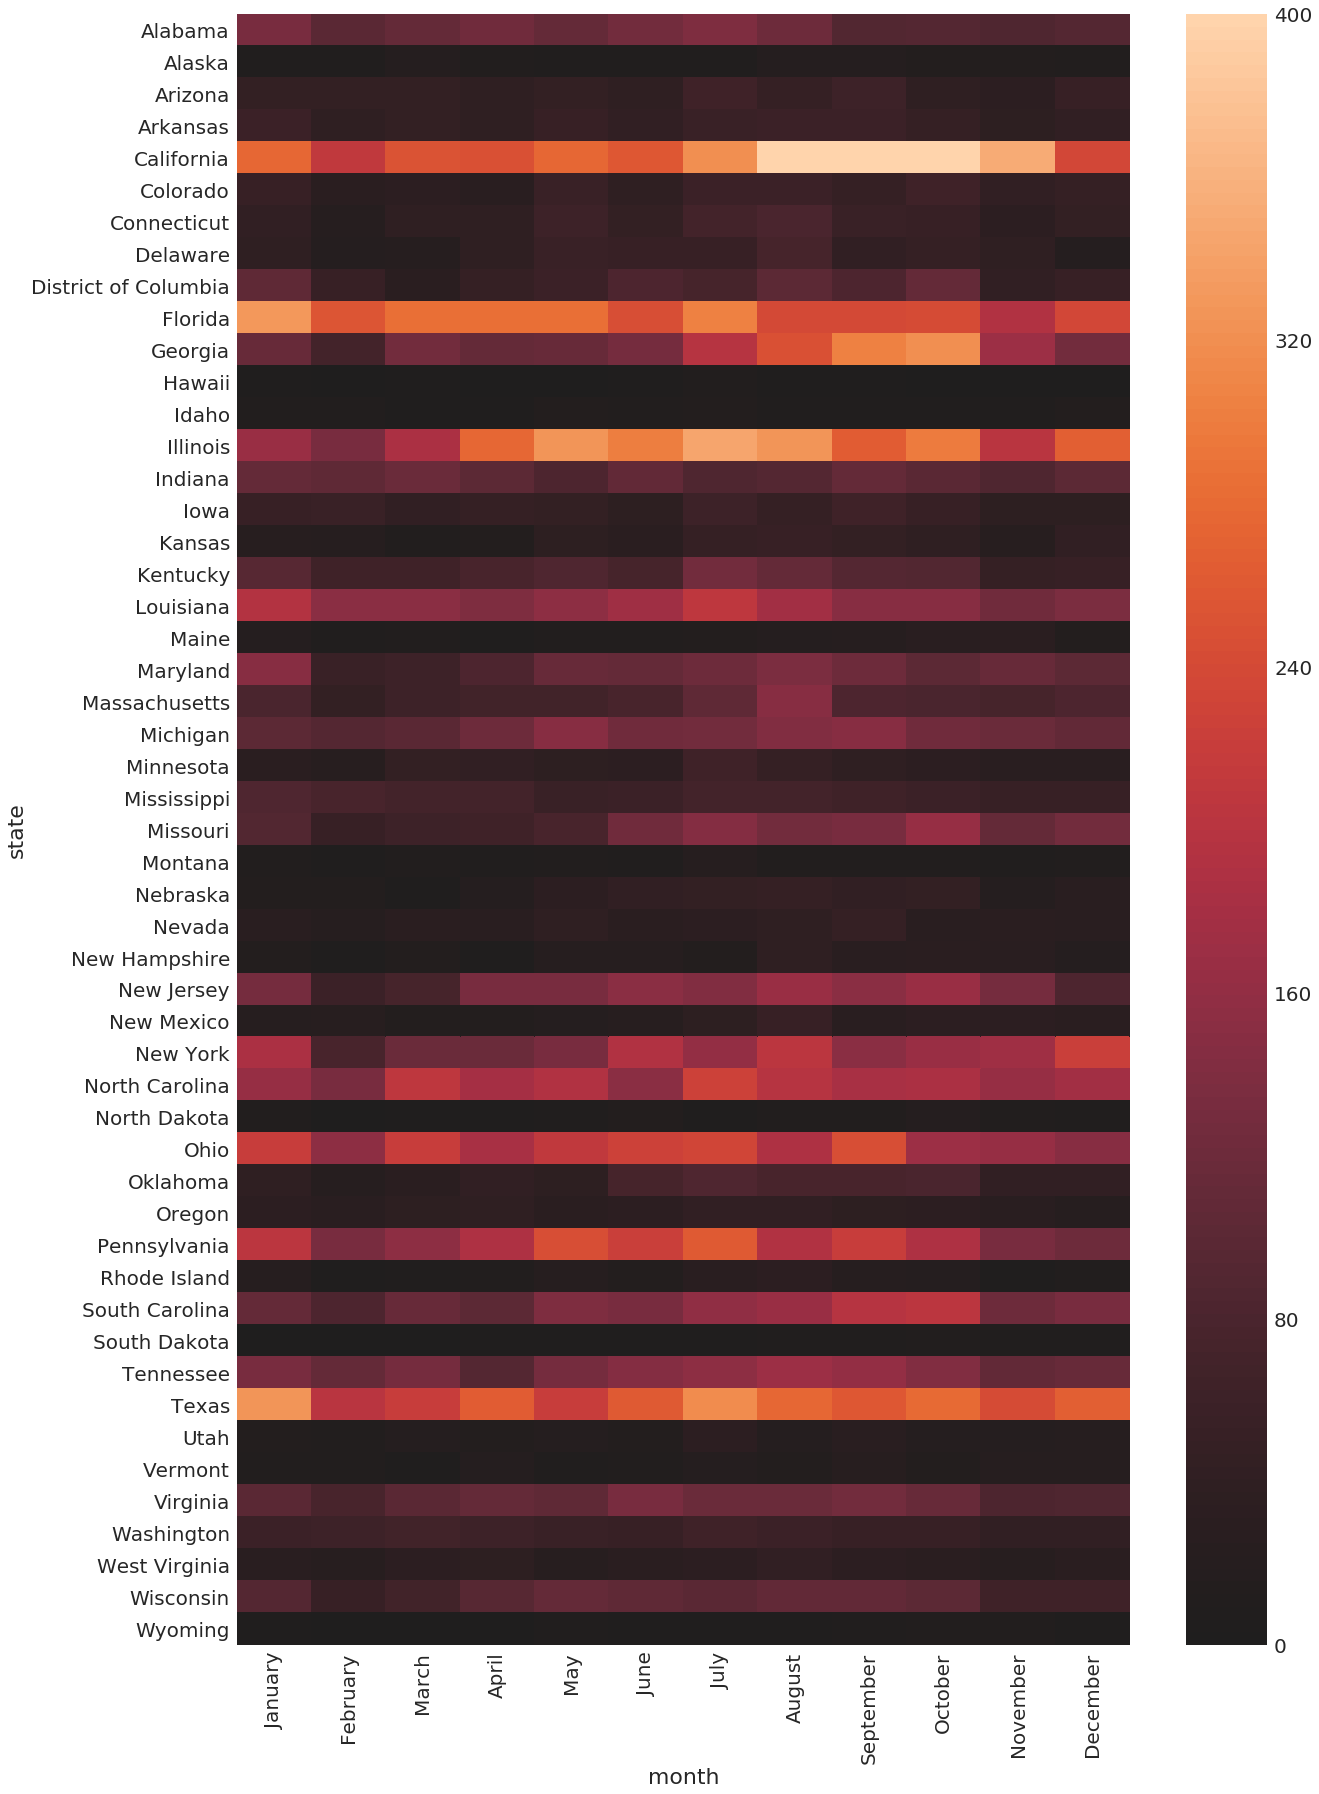

In [382]:
sns.heatmap(data=gun_incidences_per_year_aggregate_months[0], vmax=400, center=0, fmt='g')

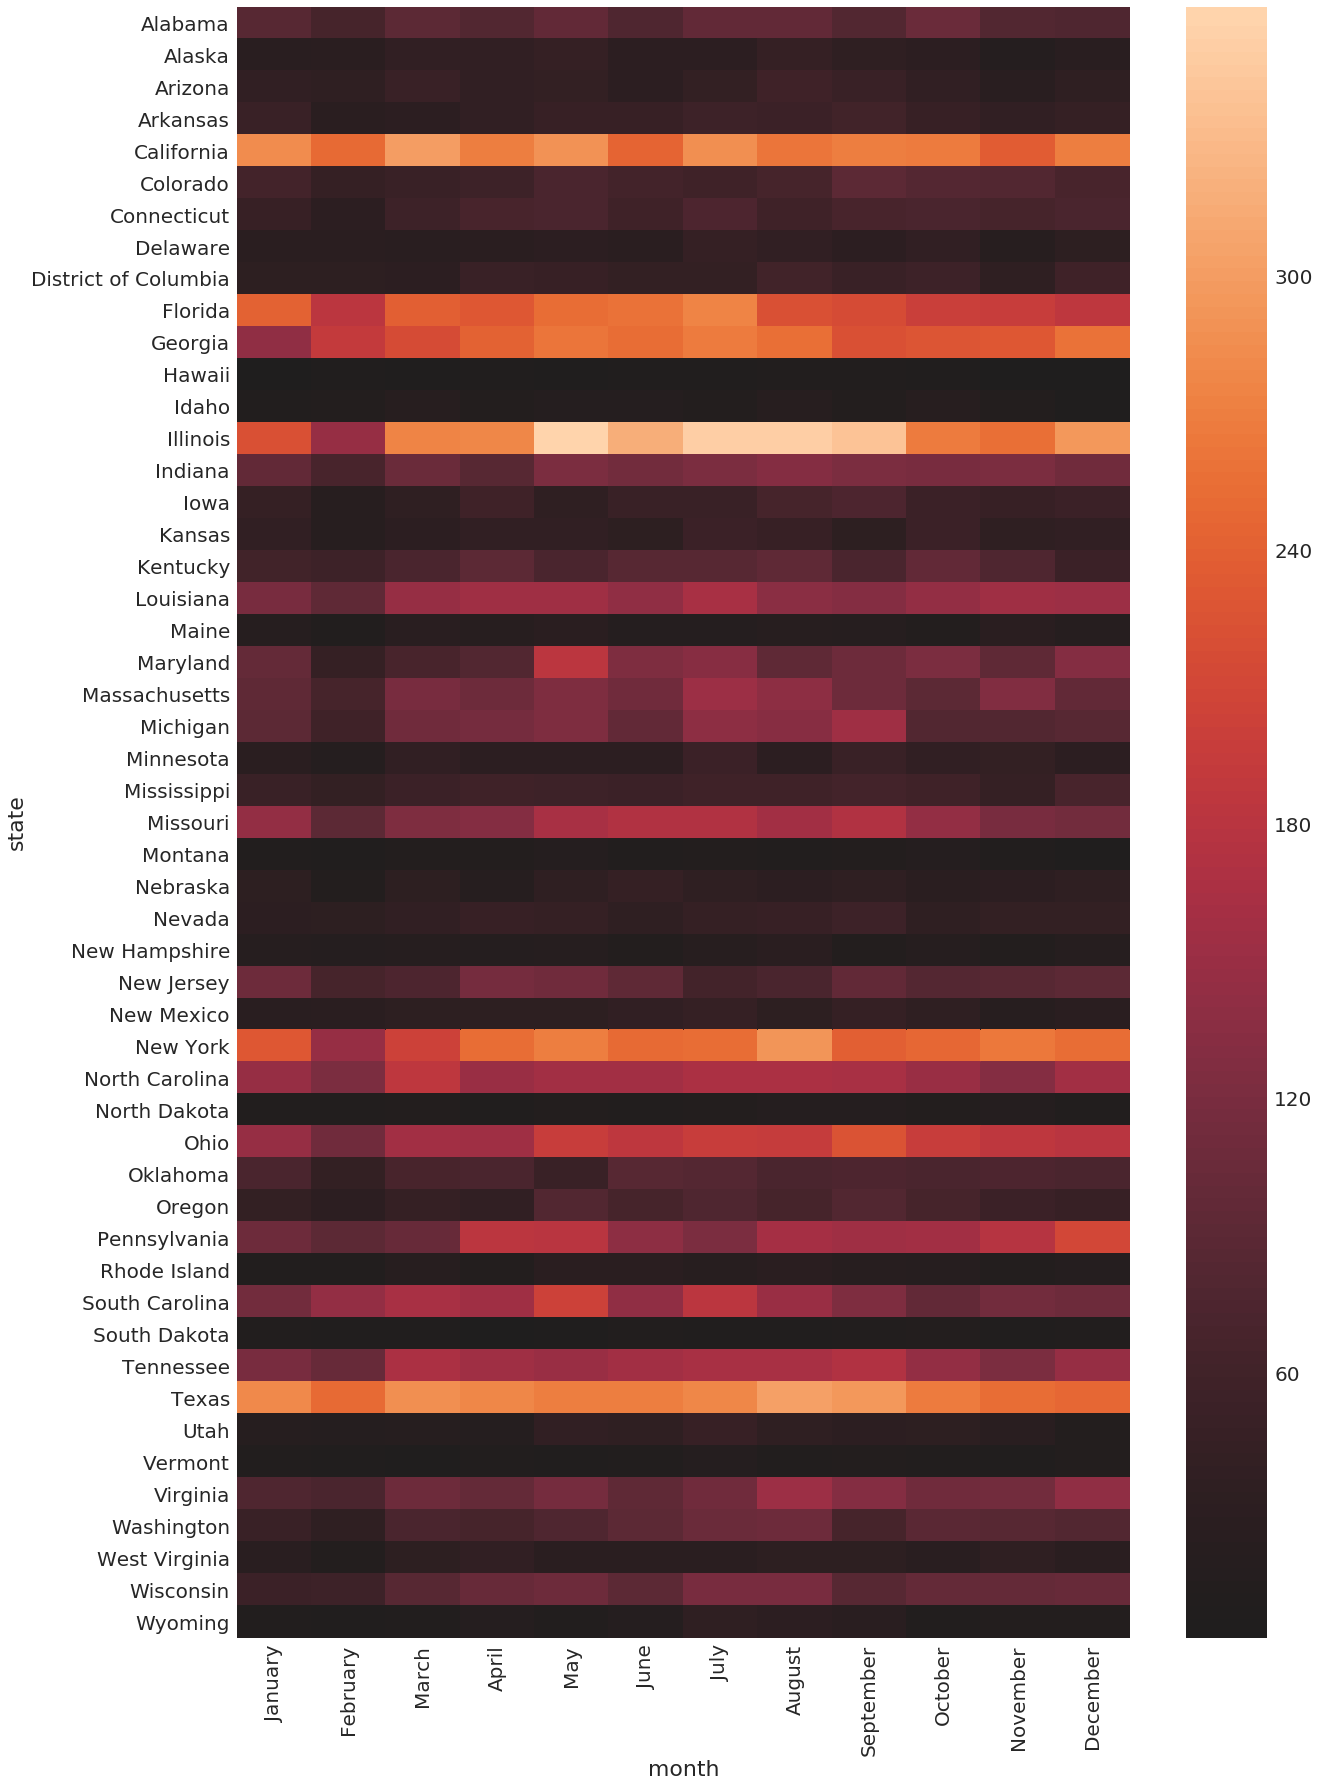

In [370]:
# heatmap for each state and their number of shootings for each month 
sns.heatmap(data=gun_incidences_per_year_aggregate_months[1], center=0, fmt='g')

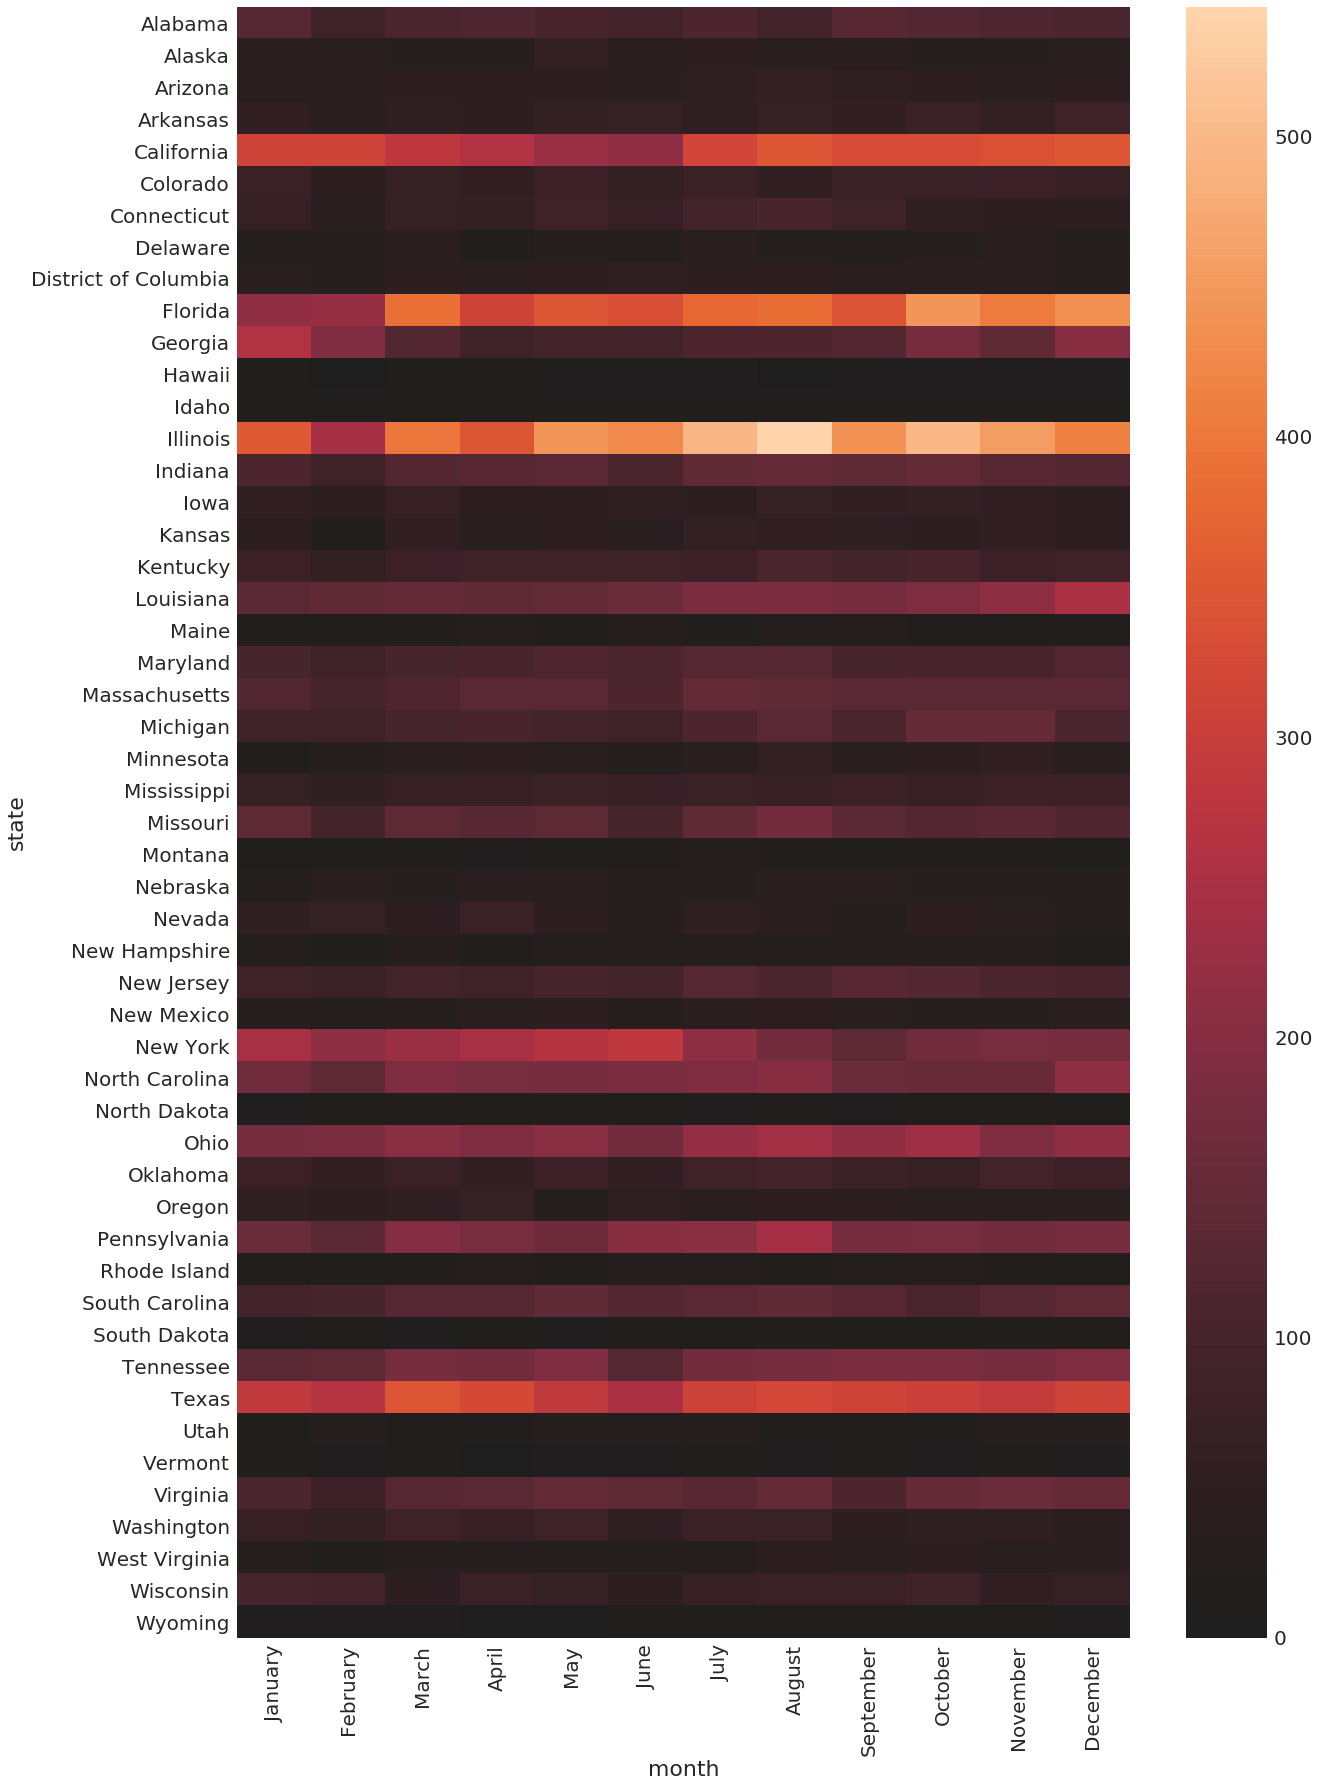

In [371]:
sns.heatmap(data=gun_incidences_per_year_aggregate_months[2], center=0, fmt='g')

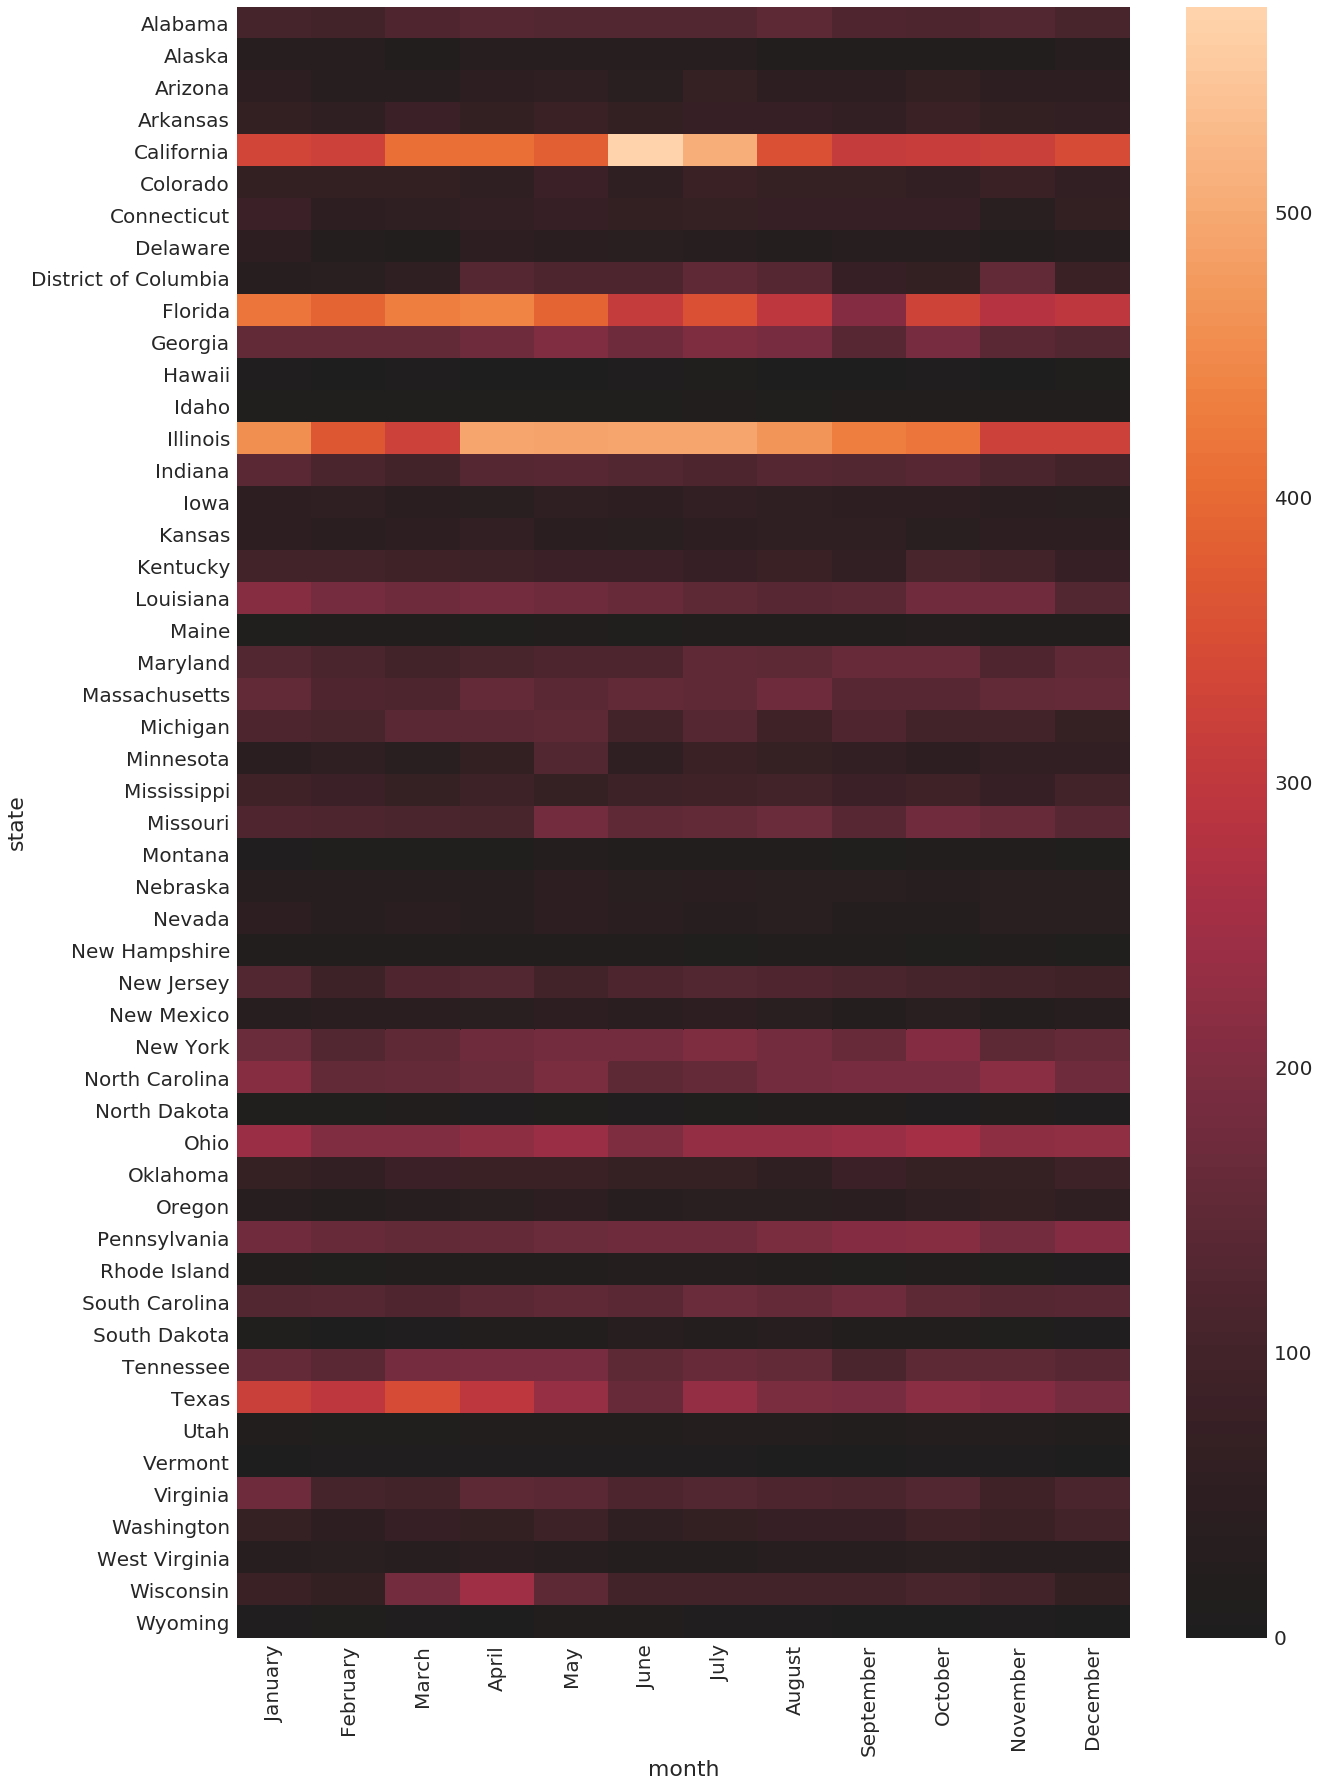

In [372]:
sns.heatmap(data=gun_incidences_per_year_aggregate_months[3], center=0, fmt='g')

In [373]:
# there are no insights to be gained by looking at the month by month shooting incidences for each individual state
# for each year 